## Drive Gaston

In [ ]:
# mount drive Gastón
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/Aprendizaje"
!ls

MessageError: ignored

## Ruta .pkl Gaston

In [ ]:
import pickle

with open('/content/drive/MyDrive/Aprendizaje/attrition_available_27.pkl', 'rb') as file:
    datos = pickle.load(file)


# Abrir datos Adela

In [ ]:
# mount drive Gastón
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/6-2-C/AA/P2/Data"
!ls

import pickle

with open('/content/drive/MyDrive/6-2-C/AA/P2/Data/attrition_available_27.pkl', 'rb') as file:
    datos = pickle.load(file)


Mounted at /content/drive/
drive  sample_data
/content/drive/MyDrive/6-2-C/AA/P2/Data
attrition_available_27.pkl


# Examinar Datos

Al tratarse de un **.pkl** no podemos saber de primeras que tipo de datos son, por tanto obtenemos mediante la siguiente función que su tipo corresponde a un Dataframe de dimensiones [4410 rows x 31 columns]

In [ ]:
print("Tipo de objeto:", type(datos))
print("Contenido del objeto:\n", datos)


Tipo de objeto: <class 'pandas.core.frame.DataFrame'>
Contenido del objeto:
            hrs  absences  JobInvolvement  PerformanceRating  \
1     7.315971      13.0             2.0                4.0   
6     6.450877      17.0             3.0                4.0   
13    8.871421      14.0             2.0                3.0   
28         NaN       6.0             2.0                3.0   
30    9.662808      11.0             2.0                3.0   
...        ...       ...             ...                ...   
4405  8.316921       6.0             3.0                3.0   
4406  5.897197       NaN             2.0                3.0   
4407       NaN      18.0             3.0                4.0   
4408  9.187612       NaN             2.0                3.0   
4409  6.511790      17.0             4.0                3.0   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age  \
1                         3.0              2.0              4.0  31.0   
6                   

### EDA del Dataframe

En primer lugar y con el objetivo de seguir la estructura del enunciado realizaremos el análisis sobre el número de instancias y atributos

In [ ]:
print("Número de instancias:", datos.shape[0])
print("Número de atributos:", datos.shape[1])


Número de instancias: 4410
Número de atributos: 31


En este caso, el DataFrame tiene 4,410 instancias y 31 atributos:

* 4,410 instancias (filas) representan 4,410 empleados individuales en el conjunto de datos.

* 31 atributos (columnas) representan las características de cada empleado, como horas trabajadas, satisfacción laboral, edad, etc.

In [ ]:
print("Tipos de atributos:")
print(datos.dtypes)

Tipos de atributos:
hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike          float64
StandardHours                int64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64


* **float64**: representa números de punto flotante (decimales), es decir, variables numéricas continuas. Por ejemplo, *hrs, absences, Age, MonthlyIncome, etc*.
* **int64**: representa números enteros, es decir, variables numéricas discretas. En este caso, hay dos columnas con este tipo de datos: *StandardHours y YearsSinceLastPromotion.*
* **object**: representa variables categóricas o de texto. Estas columnas contienen información en forma de texto o categorías, como *Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus y Over18.*

Conocer los tipos de atributos es útil para determinar qué técnicas de preprocesamiento aplicar a cada columna antes de entrenar un modelo de aprendizaje automático. Por ejemplo, las variables categóricas generalmente requieren ser transformadas en variables numéricas (a través de codificación one-hot, codificación ordinal, etc.) antes de utilizarlas en un modelo de aprendizaje automático. Además, las variables numéricas pueden requerir escalado o normalización dependiendo del algoritmo que se vaya a utilizar.


**Estudio de columnas constantes/innecesarias**

In [ ]:
columnas_constantes = [col for col in datos.columns if datos[col].nunique() <= 1]
print("Columnas constantes o innecesarias:", columnas_constantes)

Columnas constantes o innecesarias: ['EmployeeCount', 'Over18', 'StandardHours']


Las columnas constantes o innecesarias son aquellas que tienen el mismo valor para todas las instancias o que no proporcionan información útil para el análisis o la construcción del modelo de aprendizaje automático.

En este caso, se han identificado las siguientes columnas como constantes o innecesarias:

* '**EmployeeCount**': Esta columna tiene el mismo valor para todos los empleados. No proporciona información útil para predecir la atrición de los empleados, ya que no hay variabilidad en sus datos.

* '**Over18**': Esta columna indica si el empleado tiene más de 18 años de edad. Si todos los empleados tienen más de 18 años, entonces esta columna no aporta información útil para predecir la atrición de los empleados, ya que todos los empleados cumplen con este criterio.

* '**StandardHours**': Si todas las instancias tienen el mismo valor para las horas estándar, entonces no hay variabilidad en esta columna, y no aporta información útil para predecir la atrición de los empleados.

In [ ]:
#PROCEDEMOS A ELIMINAR LAS COLUMNAS
datos = datos.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)


In [ ]:
#-------------------------------------------------
#Miramos la proporcion de missing values por atributo

print("Proporción de missing values por atributo:")
print(datos.isnull().sum() / datos.shape[0]*100)

Proporción de missing values por atributo:
hrs                        20.521542
absences                   20.204082
JobInvolvement             16.281179
PerformanceRating          20.839002
EnvironmentSatisfaction    19.931973
JobSatisfaction            21.496599
WorkLifeBalance            17.437642
Age                        16.689342
Attrition                   0.000000
BusinessTravel             19.251701
Department                 17.732426
DistanceFromHome           16.938776
Education                  16.213152
EducationField             16.099773
EmployeeID                 18.049887
Gender                     21.133787
JobLevel                   17.732426
JobRole                    17.732426
MaritalStatus               0.000000
MonthlyIncome              21.065760
NumCompaniesWorked         21.224490
PercentSalaryHike          17.868481
StockOptionLevel           16.054422
TotalWorkingYears          20.362812
TrainingTimesLastYear      20.113379
YearsAtCompany             21.67

Dado que ningún atributo presenta una proporción de *missing values* mayor al 80% no se procede a eliminar ninguno de los atributos

## Tipo de problema (clasificación o regresión):

Dado que el objetivo es predecir si los empleados abandonarán la empresa, es un problema de clasificación binaria.

Otra información que afirma este hecho es la presencia de la variable objetivo Attrition la cual presenta un valor categórico ['Yes', 'No']

In [ ]:
proporcion_clases = datos['Attrition'].value_counts(normalize=True)
print("Proporción de clases:\n", proporcion_clases)


Proporción de clases:
 No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


En este caso, la proporción de clases para la columna 'Attrition' es la siguiente:

* No (empleados que no abandonaron la empresa): 83.88%
* Yes (empleados que abandonaron la empresa): 16.12%

La diferencia en la proporción de clases indica que el conjunto de datos es desbalanceado. La clase "Yes" está subrepresentada en comparación con la clase "No".

Añadir texto sobre tecnica de undersampling, oversampling etc

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix

## Texto sobre las métricas



* La métrica de **balanced_accuracy** (precisión equilibrada) es una medida que tiene en cuenta el desbalanceo de clases, calculando la precisión por cada clase y luego promediándolas. Es útil cuando las proporciones de las clases son desiguales, ya que proporciona una visión más justa del rendimiento del modelo en comparación con la precisión estándar.

* El **F1 score** es otra métrica que combina la precisión y la exhaustividad (recall) en un solo valor. Es especialmente útil cuando las clases están desbalanceadas, ya que da igual importancia a la precisión y a la exhaustividad, lo que significa que penaliza más los falsos positivos y falsos negativos que la precisión estándar.

* La **matriz de confusión** es una tabla que muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos que se produjeron en la clasificación. Es útil para visualizar el rendimiento del modelo y obtener información sobre las clases que se clasificaron incorrectamente.

## Realizamos la partición

In [ ]:
#Falta limpiar el dataframe y cambiar por version descomentada

#X = datos_limpios.drop('Attrition', axis=1)
#y = datos_limpios['Attrition']


X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=77)


NameError: ignored

## Preporcesamiento de los datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV






# Separar las variables predictoras y la variable objetivo
X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

# Codificar las etiquetas 'No' y 'Yes' en 0 y 1
le = LabelEncoder()
y = le.fit_transform(y)

# Separar los datos en conjuntos de entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Separamos las variables numéricas de las categóricas
numeric_features = [
    'hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
    'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
    'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus'
]

#CREACION DE PIPELINES

#pipeline para atributos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

"""
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())])
"""

#pipeline para atributos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))])

#Establecemos el modo en el que preprocesar las variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#-------------------------------- Aquí difiere del T9 ----------------------------------------------



# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


X = pd.get_dummies(X, columns=categorical_features)


# Verificar si el one-hot encoding se aplicó correctamente
print("X_train después del preprocesamiento:")
print(X_train_processed)
X_train.select_dtypes('object').columns

#--------------------------------Revisar si hace falta un segundo barrido de valores negativos ----------------------------------------------

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la transformación MinMaxScaler solo a las características con valores negativos
X_train_processed[:, :len(numeric_features)] = scaler.fit_transform(X_train_processed[:, :len(numeric_features)])
X_test_processed[:, :len(numeric_features)] = scaler.transform(X_test_processed[:, :len(numeric_features)])




X_train después del preprocesamiento:
[[-0.19718329 -0.96930027  1.87537061 ...  0.4694928  -0.67326391
  -0.01169075]
 [-0.19718329 -0.76533442  0.34417239 ...  1.04415793  0.59167734
   0.7311469 ]
 [-0.19718329 -1.37723195  0.34417239 ... -0.73034386  0.07066598
  -0.68544329]
 ...
 [-0.19718329 -1.5811978   0.34417239 ...  0.38607513 -0.42098306
   0.04742811]
 [-0.60781977  0.05052895  0.34417239 ... -0.97282418  0.61553552
  -0.66752493]
 [-0.300564   -1.17326611 -2.71822406 ...  0.29903612 -0.40830512
   0.5826621 ]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer






# Separar las variables predictoras y la variable objetivo
X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

# Codificar las etiquetas 'No' y 'Yes' en 0 y 1
le = LabelEncoder()
y = le.fit_transform(y)

# Separar los datos en conjuntos de entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Separamos las variables numéricas de las categóricas
numeric_features = [
    'hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
    'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
    'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus'
]

#CREACION DE PIPELINES

#pipeline para atributos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

"""
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())])
"""

#pipeline para atributos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))])

#Establecemos el modo en el que preprocesar las variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Entrenamiento con Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
lr = LogisticRegression(penalty='none', random_state = 77)


#Creación del clasificador

Logistig_regression_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight='balanced'))])
"""


Logistig_regression_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced')),
    ('scale', scaler),
    ('lr', lr)
])
"""

Logistig_regression_clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['hrs', 'absences',
                                                   'JobInvolvement',
                                                   'PerformanceRating',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance', 'Age',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeID',
                                                   'JobLevel', 'MonthlyIn...
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
#Estudiamos la prediccion

y_pred = Logistig_regression_clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 1 0 0 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       740
           1       0.31      0.65      0.42       142

    accuracy                           0.71       882
   macro avg       0.62      0.69      0.62       882
weighted avg       0.82      0.71      0.75       882



In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}")

El valor de balanced accuracy: 0.6903026265702322


NameError: ignored

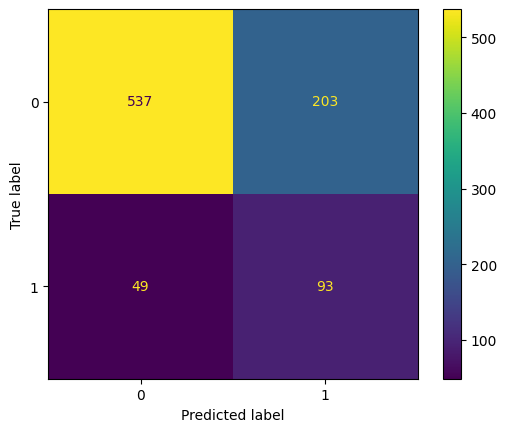

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Buscamos variables negativas que entorpecen el chi2

In [ ]:
# Crear un DataFrame de características procesadas para facilitar la inspección
feature_names = numeric_features + preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)

# Identificar características con valores negativos
negative_value_features = []
for column in X_train_df.columns:
    if X_train_df[column].min() < 0:
        negative_value_features.append(column)
        print(f"Característica '{column}' tiene un valor mínimo de {X_train_df[column].min()}")



# Entrenamiento de un modelo de Regresión logística y evaluación

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix

logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_processed, y_train)

y_pred_logreg = logreg.predict(X_test_processed)

balanced_acc_logreg = balanced_accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Balanced Accuracy (Logistic Regression):", balanced_acc_logreg)
print("F1 Score (Logistic Regression):", f1_logreg)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logreg)



Balanced Accuracy (Logistic Regression): 0.7188618195660449
F1 Score (Logistic Regression): 0.4572748267898384
Confusion Matrix (Logistic Regression):
 [[548 192]
 [ 43  99]]


La matriz de confusión muestra que de los casos negativos (No), 548 fueron clasificados correctamente y 192 incorrectamente. De los casos positivos (Yes), 99 fueron clasificados correctamente y 43 incorrectamente.

La precisión equilibrada es una medida útil en problemas de clasificación desequilibrados, ya que tiene en cuenta tanto la tasa de verdaderos positivos como la tasa de verdaderos negativos. Un valor más alto indica un mejor rendimiento del modelo. En este caso, el modelo de regresión logística tiene una precisión equilibrada de aproximadamente el 71.89%.

El F1 Score es una métrica que combina la precisión y el recall en un solo valor, siendo útil cuando se tiene un conjunto de datos desequilibrados y se quiere medir el rendimiento del modelo en la clasificación de la clase minoritaria. Un valor más alto indica un mejor rendimiento del modelo. En este caso, el modelo de regresión logística tiene un F1 Score de aproximadamente el 45.73%.

## Implementación de la Parte Adicional

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost") #nos permite filtrar que "el parámetro use_label_encoder se ha marcado como obsoleto a partir de la versión 1.7.0 de XGBoost y ya no se recomienda su uso.""

# El resto del código de la celda 3


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, objective="binary:logistic", eval_metric="logloss", random_state=42)

# Ajustar hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_clf, param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train_processed, y_train)
best_xgb = grid_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_processed)

balanced_acc_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Balanced Accuracy (XGBoost):", balanced_acc_xgb)
print("F1 Score (XGBoost):", f1_xgb)
print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)




NameError: ignored

* **Balanced Accuracy:** Se trata de una media de la recuperación (sensibilidad) obtenida en cada clase, y resulta útil cuando se trabaja con conjuntos de datos desequilibrados. Su modelo tiene una precisión equilibrada del 81,35%, lo que significa que clasifica correctamente el 81,35% de las instancias de media en ambas clases.

* **Puntuación F1:** Es la media armónica de la precisión y la recuperación, y da más peso al valor más bajo. Es una buena métrica cuando los falsos positivos y los falsos negativos tienen la misma importancia. Una puntuación F1 del 75,95% indica que el modelo tiene un rendimiento razonablemente bueno en términos de precisión y recuperación.

* **Matriz de confusión:** La matriz de confusión es una tabla que muestra el número de predicciones positivas verdaderas (TP), negativas verdaderas (TN), positivas falsas (FP) y negativas falsas (FN) para un problema de clasificación binaria. 

A partir de la **matriz de confusión**, podemos ver que el modelo tiene un número relativamente bajo de falsos positivos (5) y un número más alto de falsos negativos (52). Esto podría indicar que el modelo es más conservador a la hora de predecir la clase positiva, lo que podría dar lugar a una menor recuperación de la clase positiva.

En general, su modelo muestra un rendimiento razonablemente bueno, pero puede que desee considerar métodos para mejorar la recuperación de la clase positiva, como utilizar técnicas para manejar datos desequilibrados o ajustar el umbral de decisión.

## Método de Selección de Atributos

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Importante
* Necesitamos one hot encoding para eliminar las categoricas (tocará analizar el impacto ya que se agranda el espacio
* chi2 test solo acepta positivos usar MinMaxScaler en lugar de StandardScaler

In [ ]:
# Crear un objeto SelectKBest para cada método de selección
kbest_f_classif = SelectKBest(score_func=f_classif, k='all')
kbest_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
kbest_chi2 = SelectKBest(score_func=chi2, k='all')


# Ajustar y transformar los datos de entrenamiento y prueba
X_train_f_classif = kbest_f_classif.fit_transform(X_train_processed, y_train)
X_test_f_classif = kbest_f_classif.transform(X_test_processed)

X_train_mutual_info = kbest_mutual_info.fit_transform(X_train_processed, y_train)
X_test_mutual_info = kbest_mutual_info.transform(X_test_processed)

X_train_chi2 = kbest_chi2.fit_transform(X_train_processed, y_train)
X_test_chi2 = kbest_chi2.transform(X_test_processed)



In [ ]:
# Crear y ajustar el modelo de clasificación
classifier = LogisticRegression()

# Para f_classif
classifier.fit(X_train_f_classif, y_train)
y_pred_f_classif = classifier.predict(X_test_f_classif)
print("Resultados con f_classif:")
print(classification_report(y_test, y_pred_f_classif))

# Para mutual_info_classif
classifier.fit(X_train_mutual_info, y_train)
y_pred_mutual_info = classifier.predict(X_test_mutual_info)
print("Resultados con mutual_info_classif:")
print(classification_report(y_test, y_pred_mutual_info))

# Para chi2
classifier.fit(X_train_chi2, y_train)
y_pred_chi2 = classifier.predict(X_test_chi2)
print("Resultados con chi2:")
print(classification_report(y_test, y_pred_chi2))

Resultados con f_classif:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       740
           1       0.63      0.17      0.27       142

    accuracy                           0.85       882
   macro avg       0.75      0.58      0.59       882
weighted avg       0.82      0.85      0.81       882

Resultados con mutual_info_classif:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       740
           1       0.63      0.17      0.27       142

    accuracy                           0.85       882
   macro avg       0.75      0.58      0.59       882
weighted avg       0.82      0.85      0.81       882

Resultados con chi2:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       740
           1       0.63      0.17      0.27       142

    accuracy                           0.85       882
   macro avg       0.75      0.58      0.59  

In [ ]:
# Imprimir los resultados de cada método de selección
print("Importancia de los atributos según f_classif:")
for i, score in enumerate(kbest_f_classif.scores_):
    print(f"Atributo {i}: {score}")

print("Importancia de los atributos según mutual_info_classif:")
for i, score in enumerate(kbest_mutual_info.scores_):
    print(f"Atributo {i}: {score}")

print("Importancia de los atributos según chi2:")
for i, score in enumerate(kbest_chi2.scores_):
    print(f"Atributo {i}: {score}")

Importancia de los atributos según f_classif:
Atributo 0: 113.0737368969395
Atributo 1: 2.3174745782517574
Atributo 2: 0.32249959120758465
Atributo 3: 2.3976941378156638
Atributo 4: 36.706412668522944
Atributo 5: 28.1627799032299
Atributo 6: 13.203854530035821
Atributo 7: 78.36247954309822
Atributo 8: 0.23274098855794836
Atributo 9: 0.08296141215829432
Atributo 10: 0.04386979950975095
Atributo 11: 0.7514586086810724
Atributo 12: 4.278485000699727
Atributo 13: 3.9467056684591846
Atributo 14: 3.0596455214161655
Atributo 15: 0.5194550476964118
Atributo 16: 99.17510586391975
Atributo 17: 4.238218974750357
Atributo 18: 65.15578780804957
Atributo 19: 6.379768495252653
Atributo 20: 82.46235154445615
Atributo 21: 11.611449990037835
Atributo 22: 44.41915917837392
Atributo 23: 6.542138868411917
Atributo 24: 0.202187693997351
Atributo 25: 8.528182115986413
Atributo 26: 0.13147966186272092
Atributo 27: 1.667020813015562
Atributo 28: 0.21538627665592472
Atributo 29: 28.103745801175243
Atributo 30: 

## Importancia de los atributos

**f_classif:** Este método evalúa la importancia de las características basándose en la relación entre la variación de cada característica y la variación de la variable objetivo (en este caso, la clase). Los valores más altos indican una mayor importancia. Algunas de las características con valores más altos en tus resultados son:

* Atributo 0
* Atributo 7
* Atributo 16
* Atributo 18
* Atributo 20
* Atributo 22
* Atributo 29
* Atributo 51

**mutual_info_classif:** Este método mide la dependencia mutua entre cada característica y la variable objetivo. Los valores más altos indican una mayor dependencia, y por lo tanto, una mayor importancia. Algunas de las características con valores más altos en tus resultados son:

* Atributo 0




* Atributo 7
* Atributo 12
* Atributo 13
* Atributo 16
* Atributo 18
* Atributo 20
* Atributo 25
* Atributo 29
* Atributo 37
* Atributo 51

**chi2:** Este método evalúa la importancia de las características basándose en la prueba estadística chi-cuadrado. Los valores más altos indican una mayor dependencia entre la característica y la variable objetivo. Algunas de las características con valores más altos en tus resultados son:

* Atributo 0
* Atributo 7
* Atributo 16
* Atributo 18
* Atributo 20
* Atributo 21
* Atributo 22
* Atributo 29
* Atributo 43
* Atributo 49
* Atributo 50
* Atributo 51

A partir de estos resultados, puedes ver que algunos atributos parecen ser más importantes en los tres métodos, como los atributos 0, 7, 16, 18, 20, 29 y 51. Estos podrían ser buenos candidatos para probar en tu modelo.